## Install and import neccessery libraries

In [1]:
!pip -q install hypper

In [1]:
from hypper.plotting import *


In [2]:
import hypernetx

In [ ]:
import pandas as pd

from logging import DEBUG

from matplotlib import pyplot as plt

from hypper.hypergraph import HyperGraph
from hypper.data import read_sample_data
from hypper.plotting import HNX_Hypergraph

# Read data
#df, label, _ = read_sample_data()

#file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df)

# Select a subset of columns
#subset_columns = ['aac_1', 'aac_4', 'qso_15', 'qso_16', 'pssm_2', 'pssm_295', 'Output']

# Create a new DataFrame with the selected columns
#subset_df = df[subset_columns]
# Get column names as a list
#df = df.columns               



# Specify the column to convert to rows
#column_to_convert = 'feature_importance'

# Extract values from the specified column
#values_to_convert = [item[column_to_convert] for item in df]

# Create a new DataFrame with the values as a row
#transposed_df = pd.DataFrame([values_to_convert], columns=[column_to_convert])

#print(transposed_df)

In [3]:
# Create hypergraph
hypergraph_representation = HyperGraph(
    #input_data=df,
    input_data=df,
    label="Output",
    random_seed=42,
    verbosity=DEBUG,
)

# Display hypergraph representation
hnx_representation = HNX_Hypergraph(
    hypergraph_representation
)


[2025-06-30 16:47:09|hypper.hypergraph|INFO] - Input data shape: (454, 603).
[2025-06-30 16:47:09|hypper.hypergraph|INFO] - Input file in memory size: 2.190 MB.
[2025-06-30 16:47:09|hypper.hypergraph|DEBUG] - Creating hypergraph-based data representation ...


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[2025-06-30 16:47:10|hypper.hypergraph|DEBUG] - Hypergraph-based data representation created.


C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Standard diagram
hnx_representation.draw()
plt.show()


In [ ]:
# Drawing with collapsed nodes
hnx_representation.draw_collapse_nodes()
plt.show()

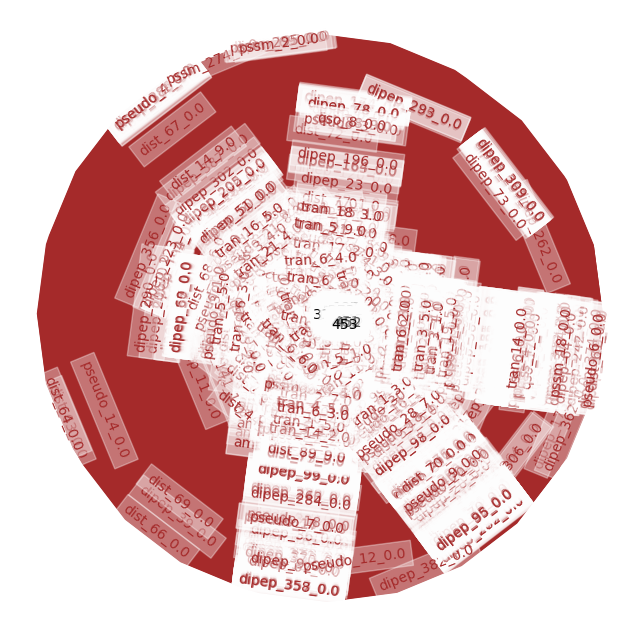

In [15]:
# Drawing with HNX specific parameters
# https://hypernetx.readthedocs.io/en/latest/drawing/drawing.html
hnx_representation.draw(
    edges_kwargs={
        'linewidths': 2,
        'edgecolors': 'brown',
    },
)
plt.show()

In [11]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 603 unique column names
column_names_list = generate_unique_column_names(603)

# Print the result


column_names_list[-1] = 'Output'
#print(column_names_list)
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)

        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 603 unique column names
column_names_list = generate_unique_column_names(603)

# Print the result


column_names_list[-1] = 'Output'
#print(column_names_list)
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)
#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df_original = df.copy()
#print(df_original.columns)
df.columns =column_names_list

dummy_cols = df.columns
org_cols = df_original.columns

# Create a hashmap using a dictionary comprehension
column_map = {a: b for a, b in zip(dummy_cols, org_cols)}
print(column_map)

#print(df.columns)


#print(df.head(10))

#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairson_new_col.csv', index=False)


        aac_1     aac_2     aac_3     aac_4     aac_5     aac_6     aac_7  \
0    0.200000  0.000000  0.000000  0.133333  0.133333  0.000000  0.000000   
1    0.000000  0.052632  0.052632  0.052632  0.157895  0.000000  0.052632   
2    0.052632  0.000000  0.105263  0.052632  0.157895  0.000000  0.000000   
3    0.000000  0.000000  0.052632  0.052632  0.157895  0.000000  0.052632   
4    0.000000  0.000000  0.000000  0.000000  0.200000  0.050000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
449  0.071253  0.031941  0.036855  0.061425  0.022113  0.088452  0.024570   
450  0.111732  0.055866  0.033520  0.027933  0.000000  0.044693  0.039106   
451  0.120419  0.078534  0.020942  0.062827  0.000000  0.062827  0.026178   
452  0.075922  0.080260  0.034707  0.073753  0.004338  0.084599  0.032538   
453  0.120253  0.078059  0.023207  0.052743  0.006329  0.086498  0.040084   

        aac_8     aac_9    aac_10  ...    qso_15    qso_16    qso_17  \
0  

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


     aac_1  aac_2  aac_3  aac_4  aac_5  aac_6  aac_7  aac_8  aac_9  aac_10  \
0      7.0    0.0    0.0    8.0    6.0    0.0    0.0    2.0    0.0     6.0   
1      0.0    2.0    2.0    3.0    7.0    0.0    3.0    1.0    0.0     0.0   
2      1.0    0.0    5.0    3.0    7.0    0.0    0.0    1.0    0.0     0.0   
3      0.0    0.0    2.0    3.0    7.0    0.0    3.0    1.0    0.0     0.0   
4      0.0    0.0    0.0    0.0    9.0    2.0    0.0    3.0    0.0     2.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
449    2.0    1.0    1.0    4.0    1.0    5.0    1.0    1.0    3.0     2.0   
450    4.0    3.0    1.0    1.0    0.0    2.0    2.0    0.0    0.0     2.0   
451    4.0    4.0    1.0    4.0    0.0    3.0    1.0    1.0    2.0     2.0   
452    2.0    4.0    1.0    4.0    0.0    5.0    2.0    1.0    2.0     2.0   
453    4.0    4.0    1.0    3.0    0.0    5.0    2.0    1.0    2.0     2.0   

     ...  qso_15  qso_16  qso_17  qso_20  pssm_2  pssm_18  pssm

In [3]:
cdwfs = CDWFS(
    weighting_iterations=2,
    weighting_normalization_strategy='l1',
    feature_values=False)

cdwfs.fit_transform(data=df, label_column="Output")
feature_importances = cdwfs.fit_transform(data=df, label_column="Output")

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  return fi.groupby(grouper, axis=0).sum()
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored 

In [4]:
feat_imp = feature_importances.copy()

In [5]:
feat_imp

,feature_importance
018wPVch,0.000437
0Dpp2qOR,0.000793
0KV84usp,0.000752
0Px0KZlk,0.001185
0Zpe5h7p,0.000597
...,...
zY264i6E,0.002460
zYDRA4ZG,0.001161
zgfkmh73,0.000663
zrEWqIiD,0.000879


In [6]:

# Create a new column "feature" by taking the index values of the "feat_imp" dataframe
feat_imp['feature'] = feat_imp.index.values
#feat_imp['original_feature'] = df_original.columns

feat_imp.columns

Index(['feature_importance', 'feature'], dtype='object')

In [7]:
#reorder column names, first column is "feature" and second column is "feature_importance"
feat_imp = feat_imp[['feature', 'feature_importance']]
feat_imp

,feature,feature_importance
018wPVch,018wPVch,0.000437
0Dpp2qOR,0Dpp2qOR,0.000793
0KV84usp,0KV84usp,0.000752
0Px0KZlk,0Px0KZlk,0.001185
0Zpe5h7p,0Zpe5h7p,0.000597
...,...,...
zY264i6E,zY264i6E,0.002460
zYDRA4ZG,zYDRA4ZG,0.001161
zgfkmh73,zgfkmh73,0.000663
zrEWqIiD,zrEWqIiD,0.000879


In [8]:
df_sorted = feat_imp.sort_values(by='feature_importance', ascending=False)

#df_sorted.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_imp_de10.csv', index=False)

In [9]:
df_sorted

,feature,feature_importance
zY264i6E,zY264i6E,0.002460
zM3cgiKP,zM3cgiKP,0.002419
NF21nRX6,NF21nRX6,0.002324
TlrLdHGB,TlrLdHGB,0.002316
io1NXXIm,io1NXXIm,0.002276
...,...,...
CnEIRex7,CnEIRex7,0.000108
P7rZlRDv,P7rZlRDv,0.000108
jpsRVcyA,jpsRVcyA,0.000108
K3ACu9sV,K3ACu9sV,0.000106


In [10]:
rows = df_sorted.shape[0]
df_backup = df_sorted.copy()
df_backup ['original_feature'] = feat_imp.index.values
df_sorted

,feature,feature_importance
zY264i6E,zY264i6E,0.002460
zM3cgiKP,zM3cgiKP,0.002419
NF21nRX6,NF21nRX6,0.002324
TlrLdHGB,TlrLdHGB,0.002316
io1NXXIm,io1NXXIm,0.002276
...,...,...
CnEIRex7,CnEIRex7,0.000108
P7rZlRDv,P7rZlRDv,0.000108
jpsRVcyA,jpsRVcyA,0.000108
K3ACu9sV,K3ACu9sV,0.000106


In [11]:
df_sorted.iloc[0,0]

'zY264i6E'

In [12]:
for index, value in df_sorted['feature'].items():
    if value in column_map:
        org_val = column_map[value]
        df_backup.at[index, 'original_feature'] = org_val
        

In [13]:
df_backup = df_backup[['original_feature','feature', 'feature_importance']]
df_backup

,original_feature,feature,feature_importance
zY264i6E,pseudo_2,zY264i6E,0.002460
zM3cgiKP,pssm_2,zM3cgiKP,0.002419
NF21nRX6,pseudo_4,NF21nRX6,0.002324
TlrLdHGB,pssm_18,TlrLdHGB,0.002316
io1NXXIm,pseudo_6,io1NXXIm,0.002276
...,...,...,...
CnEIRex7,dipep_98,CnEIRex7,0.000108
P7rZlRDv,dipep_138,P7rZlRDv,0.000108
jpsRVcyA,dipep_358,jpsRVcyA,0.000108
K3ACu9sV,dipep_373,K3ACu9sV,0.000106


In [14]:
df_backup.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_CDWFS_feat_mapped_d10New.csv', index=False)

In [15]:

rwfs = RandomWalkFS(
    iterations=400,
    walk_length=3,
    scoring_variant='v1_3',
    feature_values=False)
feature_importances = rwfs.fit_transform(data=df, label_column='Output')
feature_importances
feature_importances.sort_values(by='feature_importance', ascending=False)
feature_importances

C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\surai\anaconda3\lib\site-packages\hypper\feature_selection\feature_selection.py:27: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed

,feature_importance
018wPVch,1.0
0Dpp2qOR,1.0
0KV84usp,1.0
0Px0KZlk,1.0
0Zpe5h7p,3.0
...,...
zY264i6E,5.0
zYDRA4ZG,2.0
zgfkmh73,3.0
zrEWqIiD,1.0


In [ ]:
import numpy as np
import pandas as pd

from hypper.undersampling import CDWU
from hypper.feature_selection import CDWFS, RandomWalkFS
from hypper.data import read_german_data
import string
import random
from sklearn.preprocessing import KBinsDiscretizer

def generate_unique_column_names(num_columns):
    column_names = set()
    while len(column_names) < num_columns:
        # Generate a random string of alphanumeric characters
        new_column = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
        column_names.add(new_column)

    return list(column_names)

# Generate 603 unique column names
column_names_list = generate_unique_column_names(603)

# Print the result


column_names_list[-1] = 'Output'
#print(column_names_list)
file_path = 'D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairsoncorrelation.csv'

# Read the CSV file into a pandas DataFrame
#df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

# Create a DataFrame
#df = pd.DataFrame(data)

df=data.copy()

#df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

df['Output'] = df['Output'].replace({1: 'Yes', -1: 'No'})

print(df)
# Select only numerical columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Initialize KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# Fit and transform the data for all numerical columns
df[numeric_columns] = kbins.fit_transform(df[numeric_columns])

# Display the DataFrame
print(df)
#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/hyp_descretization_10_feat_val.csv', index=False)
df_original = df.copy()
#print(df_original.columns)
df.columns =column_names_list

dummy_cols = df.columns
org_cols = df_original.columns

# Create a hashmap using a dictionary comprehension
column_map = {a: b for a, b in zip(dummy_cols, org_cols)}
print(column_map)

#print(df.columns)


#print(df.head(10))

#df.to_csv('D:/Research_Work/Disertation Project 3/RawData/FeatureExtraction/pairson_new_col.csv', index=False)
